In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, Math
matplotlib.rc('font', size=20)
matplotlib.rc('font', family='serif')
matplotlib.rc('figure', figsize=(13, 8))
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('lines', markersize=12)
matplotlib.rc('figure.subplot', hspace=.1)
matplotlib.rc('animation', html='html5')

# Computational Stochastic Processes Course Work

**This is all my own unaided work unless stated otherwise.**

Jiachun Wang, 01792931

## Q 1.3

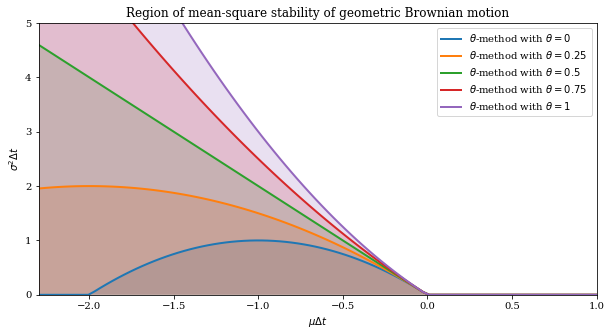

In [2]:
theta = [0,0.25,0.5,0.75,1]
x = np.linspace(-2.5,1,100)
fig,ax = plt.subplots(figsize=(10,5))
for thet in (theta):
    y = np.maximum(0, -(1-2*thet)*x**2-2*x)
    ax.fill_between(x, 0, y, alpha = 0.2)
    ax.plot(x,y,label = r"$\theta$-method with $\theta ={}$".format(thet))
ax.legend()
ax.set_ylim(0, 5)
ax.set_xlim(-2.3, 1)
ax.set_ylabel("$\sigma^2\Delta t$")
ax.set_xlabel("$\mu\Delta t$")
plt.title("Region of mean-square stability of geometric Brownian motion")
plt.show()

## Q 1.5

In [3]:
theta,mu,sigma = 0.25,-1,1
dt,m,n = 1,10**5,100

x0 = lambda m: np.ones(m)

def SDE_prod (theta,mu,sigma,dt_prime,m,n):
    #Coefficients
    b = lambda x:mu*x
    sig = lambda x:sigma*x
    
    def iterate(X,dt):
        dw = np.random.randn(len(X))* np.sqrt(dt)
        return X + (theta*b(X)+(1-theta)*b(X))*dt + sig(X)*dw + 1/2*sigma*sig(X)*(dw**2-dt)
    
    SDE = x0(m)
    for i in range(n-1):
        SDE = iterate(SDE,dt_prime)
    return SDE

In [4]:
x1 = SDE_prod(theta,mu,sigma,2*dt,m,n)
x2 = SDE_prod(theta,mu,sigma,0.5*dt,m,n)

display(Math('E^{2\Delta t}_{100}='))
print(np.mean(x1**2))
display(Math('E^{0.5\Delta t}_{100}='))
print(np.mean(x2**2))

<IPython.core.display.Math object>

5.011699388736067e+55


<IPython.core.display.Math object>

7.356696671457472e-60


## Q 2.4

In [5]:
theta,mu,sigma = 1,-1,np.sqrt(2)
dt,m,T = 0.01,10**5,1
t_space = np.linspace(0,T,101)
x0 = lambda m: 1 + np.random.rand(m)

def SDE_prod (theta,mu,sigma,dt_prime,m):
    a = lambda dt: np.exp(-theta*dt)
    b = lambda dt: sigma*np.sqrt((1-np.exp(-2*theta*dt))/(2*theta))
                                   
    def iterate(x, dt):
        eta = np.random.randn(m)
        return mu+a(dt)*(x - mu)+b(dt)*eta
    
    SDE = np.zeros((101, m))
    SDE[0] = x0(m)
    
    for i in range(100):
            SDE[i + 1] = iterate(SDE[i], t_space[i+1]-t_space[i])
    return SDE

99% Confidence Interval:(0.8693690654654772, 0.898846179591915)


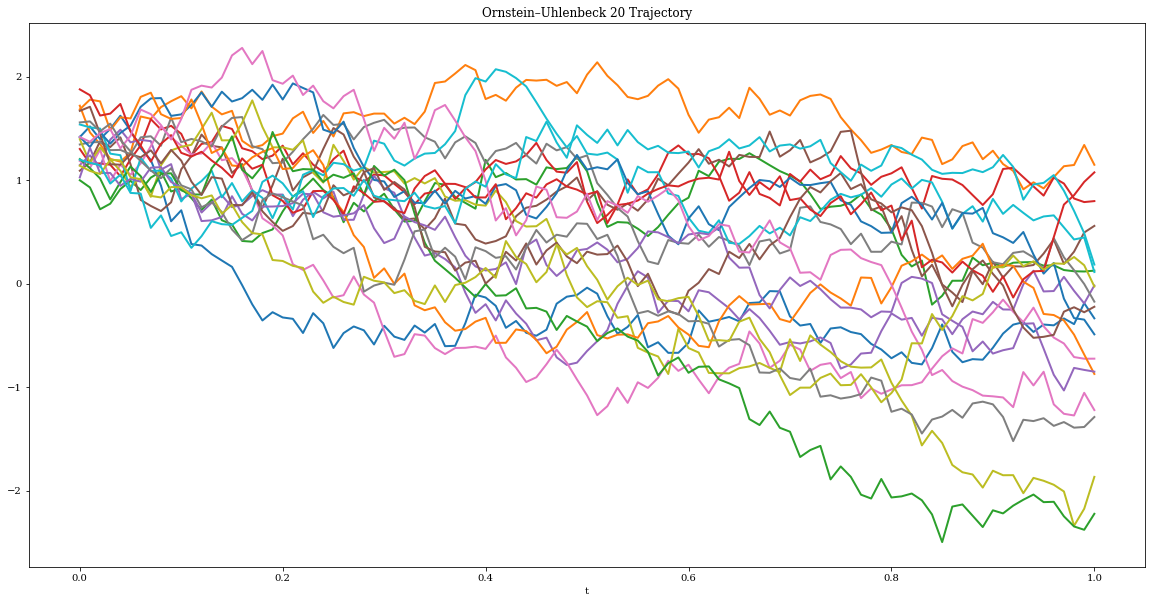

In [6]:
np.random.seed(1)
x = SDE_prod(theta,mu,sigma,dt,m)

I = np.mean(x[100,]**2)
sig = np.sum((x[100,]-I)**2) / (m-1)

Interval = stats.norm.interval(0.99, loc=I, scale=sig/np.sqrt(m))
print('99% Confidence Interval:{}'.format(Interval))

ax = plt.figure(figsize=(20,10))
plt.plot(t_space, x[:, :20])
plt.title("Ornstein–Uhlenbeck 20 Trajectory")
plt.xlabel("t")
plt.show()

## Q 2.6

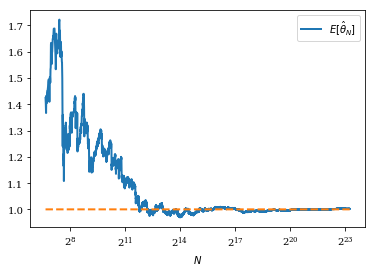

In [2]:
np.random.seed(1)
dt = 0.1
x0 = 0
mu, theta, sigma = -1, 1, np.sqrt(2)
def ou_trajectory(M, N):
    x = np.zeros((N + 1, M))
    eta = np.random.randn(N, M)
    x[0] = x0
    for i in range(N):
        x[i+1] = x[i] - theta * dt * (x[i]-mu) + np.sqrt(dt) * sigma * eta[i]
    return x

# Calculate estimator
M, N = 1, 10**7
x = ou_trajectory(M, N)
dx = np.diff(x, axis=0)
num = np.cumsum((x[1:-1]-mu)*dx[1:], axis=0)
denom = np.cumsum((x[1:-1]-mu)**2, axis=0)
estimator = - (1/dt) * num / denom

mean = np.mean(estimator, axis=1)
Ns = np.arange(2, N + 1)

cutoff = 100
fig, ax1 = plt.subplots()
ax1.set_xlabel('$N$')
ax1.set_xscale('log', basex=2)
ax1.plot(Ns[cutoff:], mean[cutoff:], label=r"$E [\hat \theta_N]$")
ax1.plot(Ns[cutoff:], 0*Ns[cutoff:]+theta , ls='--')
ax1.legend()
plt.show()

## Q 3.6

In [4]:
theta,mu,sigma = 1,-1,1
dt,m,T = 0.1,10**5,1
x0 = lambda m: np.ones(m)
t_space = np.linspace(0,T,101)
def SDE_prod (theta,mu,sigma,dt_prime,m):
                                   
    def iterate(x, dt):
        eta = np.random.randn(m)
        dw = np.sqrt(dt) * eta
        return x+ dt*mu*x + dw*sigma*x + (dt**2)/2*mu**2*x + \
                dt*dw*mu*x + (dw**2)/2*sigma**2*x + (dt*dw**2)/2*mu*sigma**2*x \
                + (dw**3)/6*sigma**3*x + (dw**4)/24*sigma**4*x
    times = len(t_space)
    SDE = np.zeros((times, m))
    SDE[0] = x0(m)
    
    for i in range(times-1):
            SDE[i + 1] = iterate(SDE[i], t_space[i+1]-t_space[i])
    return SDE

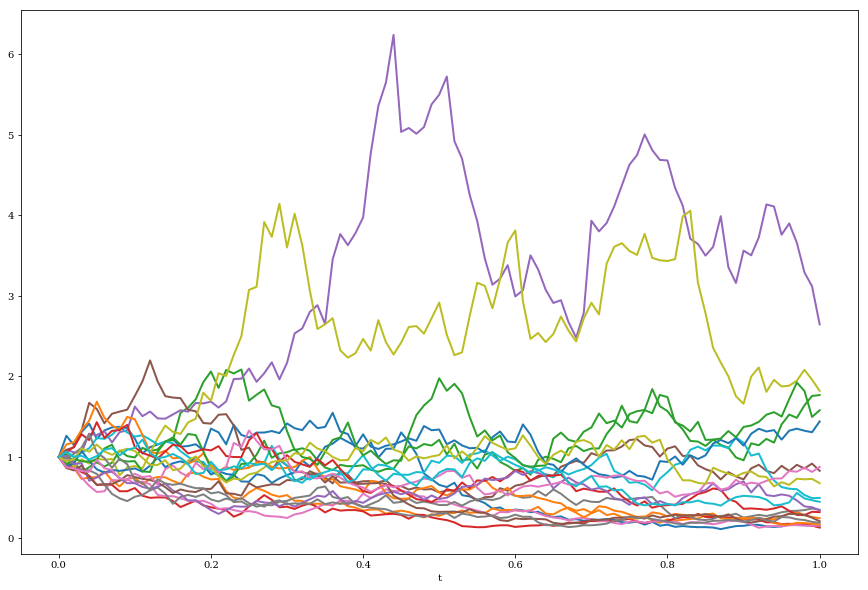

In [7]:
np.random.seed(1)
x = SDE_prod(theta,mu,sigma,dt,m)

ax = plt.figure(figsize=(15,10))
plt.plot(t_space, x[:, np.random.choice(x.shape[1], 20, replace=False)])
plt.xlabel("t")
plt.show()